In [3]:
#numpy and pandas initialization
import numpy as np
import pandas as pd
PlayTennis=pd.read_csv('weather.csv')

In [4]:
PlayTennis

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


In [5]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

PlayTennis['outlook'] = Le.fit_transform(PlayTennis['outlook'])
PlayTennis['temperature'] = Le.fit_transform(PlayTennis['temperature'])
PlayTennis['humidity'] = Le.fit_transform(PlayTennis['humidity'])
PlayTennis['windy'] = Le.fit_transform(PlayTennis['windy'])
PlayTennis['play'] = Le.fit_transform(PlayTennis['play'])

In [6]:
PlayTennis

,outlook,temperature,humidity,windy,play
0,0,1,0,0,1
1,0,0,1,1,1
2,0,2,0,1,1
3,0,1,1,0,1
4,1,2,0,0,1
5,1,0,1,0,1
6,1,0,1,1,0
7,1,2,1,0,1
8,1,2,0,1,0
9,2,1,0,0,0


In [7]:
y = PlayTennis['play']
X = PlayTennis.drop(['play'],axis=1)

In [8]:
# Fitting the model
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X, y)

[Text(0.4, 0.9, 'x[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3, 0.5, 'x[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2, 0.3, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7, 0.5, 'x[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.3, 'x[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

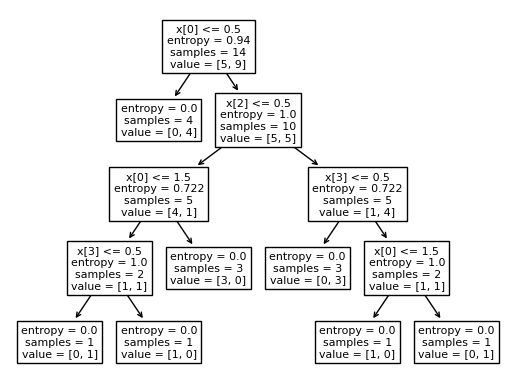

In [9]:
# We can visualize the tree using tree.plot_tree
tree.plot_tree(clf)

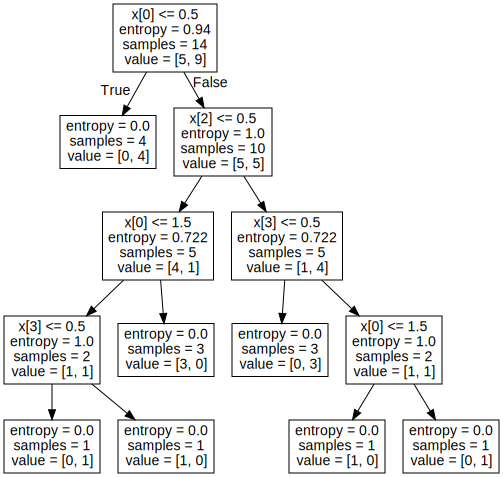

In [10]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [11]:
# The predictions are stored in X_pred
X_pred = clf.predict(X)

In [12]:
# verifying if the model has predicted it all right.
X_pred == y

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool